In [128]:
# Path: src\analysis.ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from values import Values
plt.rcParams['font.size'] = 17

In [90]:
directory = '../data/c3_data'

c3_data = {}

for filename in os.listdir(directory):
    if os.path.isfile(os.path.join(directory, filename)):
        c3_data[filename] = pd.DataFrame(pd.read_csv(os.path.join(directory, filename))).drop(0).reset_index(drop=True).astype(np.float64)

## Viewing the Data

In [ ]:
gaussian = lambda x, a, b, c, d: a * np.exp(-((x-b)/c)**2) + d
peak_times = np.array([])

for filename, df in c3_data.items():

    fig = plt.figure(figsize=(10, 20))
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)

    ax1.plot(
        df["Source"],
        df["CH2"],
        label=filename,
        color="black",
        ls="None",
        marker=".",
        markersize=1,
    )


    df_curve = df[df["Source"] >= 1e-6].reset_index(drop=True) # only look at curve after 1.5us
    max_index = df_curve["CH2"].idxmax() # index of ampltiude of curve
    max_time = df_curve["Source"][max_index] # time of amplitude of curve
    peak_times = np.append(peak_times, max_time)

    ax2.plot(
        df_curve["Source"],
        df_curve["CH2"],
        label=filename,
        color="black",
        ls="None",
        marker=".",
        markersize=1,
    )

    popt, pcov = curve_fit(gaussian, df_curve["Source"], df_curve["CH2"], maxfev=50000, p0=[1, np.mean(df_curve["Source"]), np.std(df_curve["Source"]), 0])

    ax2.plot(
        df_curve["Source"],
        gaussian(df_curve["Source"], *popt),
        label="Gaussian Fit",
        color="red",
        ls="-",
    )

    ax1.set_xlabel("Time / s")
    ax1.set_ylabel("Voltage / V")
    ax1.legend()

    ax2.set_xlabel("Time / s")
    ax2.set_ylabel("Voltage / V")
    ax2.legend()

    fig.tight_layout()

## Finding Drift Velocity & Mobility ($\mu$)

638.380992119265
133.01025514302754


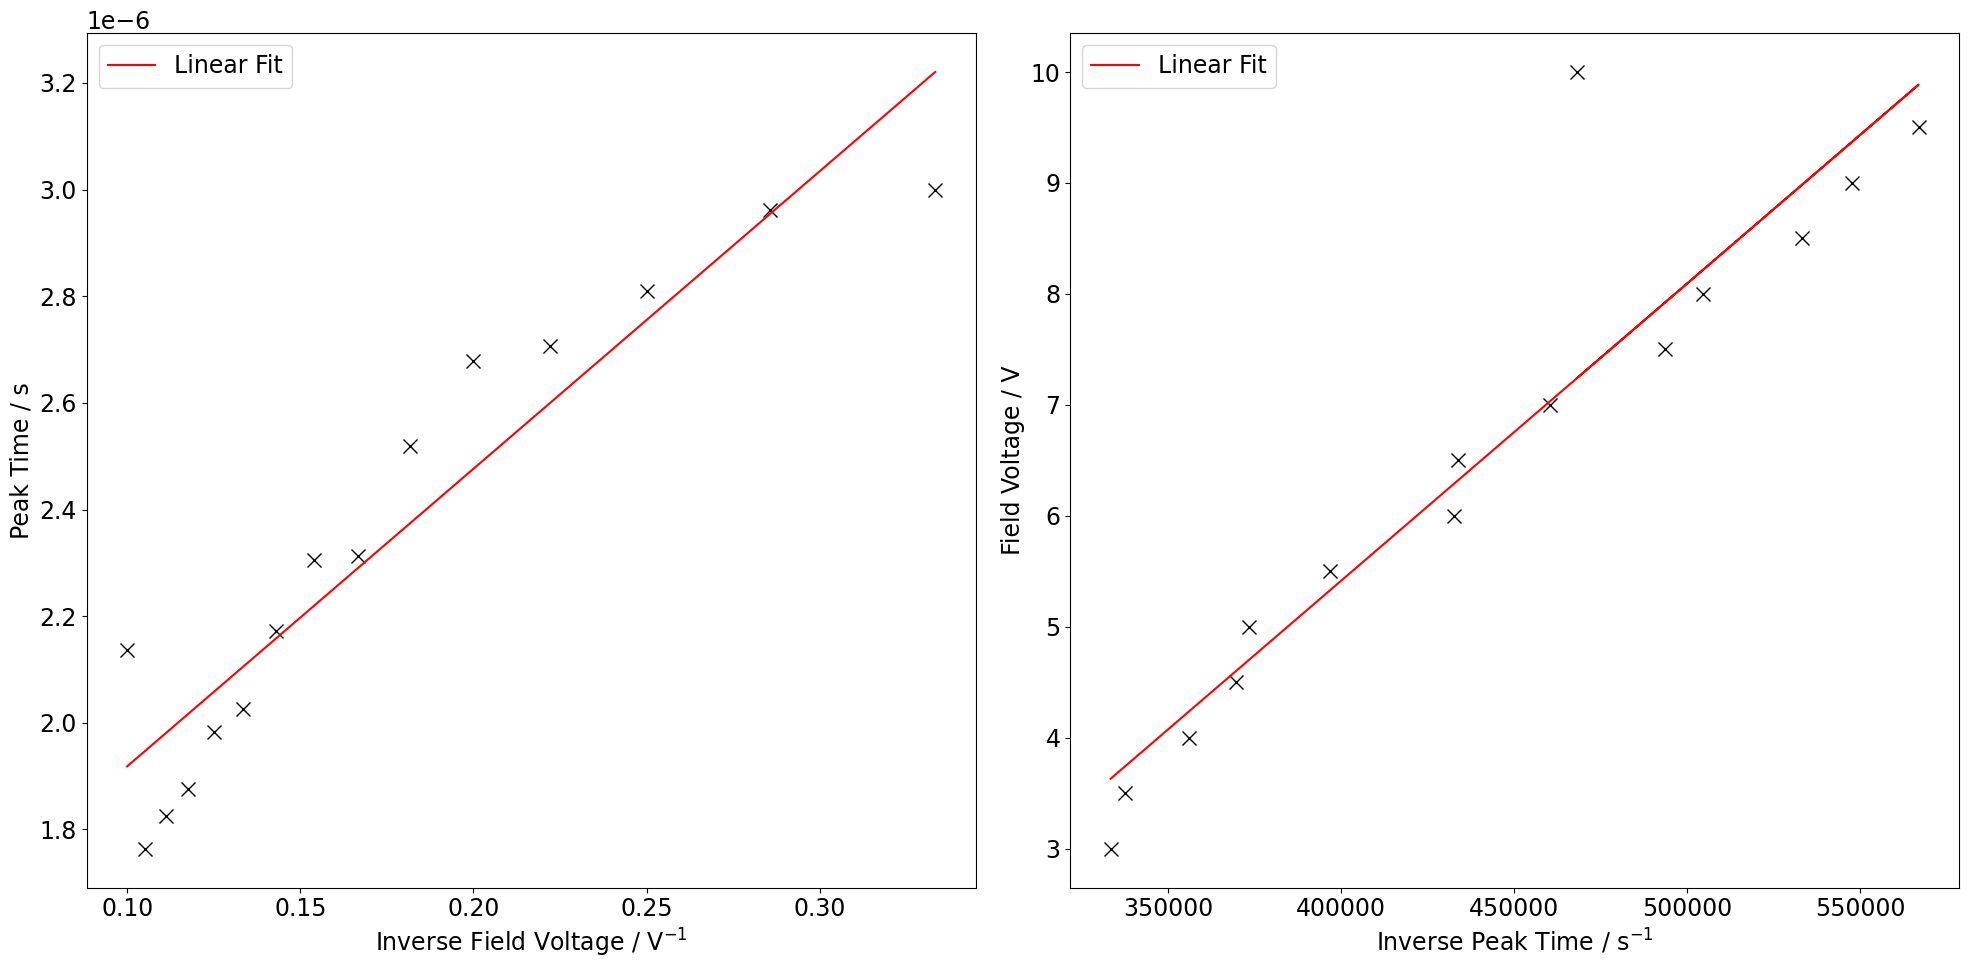

In [142]:
linear = lambda m,x,c: m*x+c
c3_voltages = np.linspace(3, 10, 15)
voltage_time_dict = dict(zip(peak_times, c3_voltages))
d_3 = 375e-6 # distance between emitter and contact 3 (C3)

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(
    c3_voltages**-1,
    peak_times,
    color="black",
    ls="None",
    marker="x",
    markersize=10,
)

popt, pcov = curve_fit(linear, c3_voltages**-1, peak_times, maxfev=50000)
ax1.plot(
    c3_voltages**-1,
    linear(c3_voltages**-1, *popt),
    label="Linear Fit",
    color="red",
    ls="-"
)

gradient, intercept = popt[0], popt[1]
mobility = (d_3 * Values().BARLENGTH) / gradient
print(mobility * 100**2)

ax2.plot(
    peak_times**-1,
    c3_voltages,
    color="black",
    ls="None",
    marker="x",
    markersize=10,
)

popt, pcov = curve_fit(linear, peak_times**-1, c3_voltages, maxfev=50000)
ax2.plot(
    peak_times**-1,
    linear(peak_times**-1, *popt),
    label="Linear Fit",
    color="red",
    ls="-"
)

ax1.set_xlabel("Inverse Field Voltage / V$^{-1}$")
ax1.set_ylabel("Peak Time / s")
ax1.legend()

ax2.set_xlabel("Inverse Peak Time / s$^{-1}$")
ax2.set_ylabel("Field Voltage / V")
ax2.legend()


fig.tight_layout()

gradient, intercept = popt[0], popt[1]
mobility = (d_3 * Values().BARLENGTH) / gradient
print(mobility * 100**2)

